In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(seed=1)
X_min = 4
X_max = 30
X_n = 16
X = 5 + 25*np.random.rand(X_n)
Prm_c = [170, 108, 0.2]
T = Prm_c[0] - Prm_c[1]*np.exp(-Prm_c[2]*X) + 4*np.random.randn(X_n)
np.savez('ch5_data.npz', X=X, X_min = X_min, X_max=X_max, X_n=X_n, T= T)

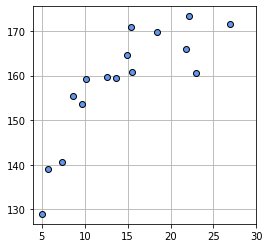

In [3]:
plt.figure(figsize=(4,4))
plt.plot(X, T, marker='o', linestyle='None', markeredgecolor='black', color='cornflowerblue')
plt.xlim(X_min,X_max)
plt.grid(True)
plt.show()

## mean square error(MSE)
$$ J = \frac{1}{N}\sum_{n=0}^{N-1}{(y_n-t_n)^2} $$

$$y_n = y(x_n) = w_0x_n + w_1$$

$$\textbf{w}(t+1) = \textbf{w}(t) - \alpha\nabla_\textbf{w}J|_{\textbf{w}(t)}$$

##### $\alpha$ = learning rate, J = error function, t = iteration, w = parameter

## gradient
$$ y_n = w_0x_n + w_1$$
$$ J = \frac{1}{N}\sum_{n=0}^{N-1}{(y_n-t_n)^2} = \frac{1}{N}\sum_{n=0}^{N-1}{(w_0x_n + w_1 - t_n)^2}$$
$$ \frac{\partial J}{\partial w_0} = \frac{2}{N}\sum_{n=0}^{N-1}{(w_0x_n + w_1- t_n)x_n} = \frac{2}{N}\sum_{n=0}^{N-1}(y_n - t_n)x_n$$
$$ \frac{\partial J}{\partial w_1} = \frac{2}{N}\sum_{n=0}^{N-1}{(w_0x_n + w_1- t_n)} = \frac{2}{N}\sum_{n=0}^{N-1}(y_n-t_n)$$

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1483: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1484: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: UserWarning: No contour levels were found within the data range.


iteration 13820
W=[1.539947, 136.176160]
dMSE=[-0.005794, 0.099991]


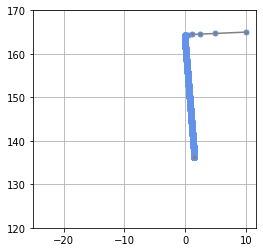

In [6]:
def mse_line(x, t, w):
  y=w[0]*x + w[1]
  mse = np.mean((y-t)**2)
  return

def dmse_line(x, t, w):
  y = w[0]*x + w[1]
  d_w0 = 2*np.mean((y-t)*x)
  d_w1 = 2*np.mean(y-t)
  return d_w0, d_w1

def fit_line_num(x,t):
  w_init = [10.0, 165.0] #initial w
  alpha = 0.001 #learning rate
  i_max = 100000 #max iteration
  eps = 0.1 #end limit
  w_i = np.zeros([i_max, 2])
  w_i[0, :] = w_init

  for i in range(1, i_max):
    dmse = dmse_line(x, t, w_i[i-1])
    w_i[i, 0] = w_i[i - 1, 0] - alpha * dmse[0] 
    w_i[i, 1] = w_i[i - 1, 1] - alpha * dmse[1]
    if max(np.absolute(dmse)) < eps:
      break
  w0 = w_i[i, 0]
  w1 = w_i[i, 1]
  w_i = w_i[:i,:]

  return w0, w1, dmse, w_i

plt.figure(figsize=(4,4))
xn = 100
w0_range=[-25,-25]
w1_range = [120, 170]
x0 = np.linspace(w0_range[0], w0_range[1], xn)
x1 = np.linspace(w1_range[0], w1_range[1], xn)
xx0, xx1 = np.meshgrid(x0,x1)
J = np.zeros((len(x0), len(x1)))
for i0 in range(xn):
  for i1 in range(xn):
    J[i1, i0] = mse_line(X, T, (x0[i0], x1[i1]))
cont = plt.contour(xx0, xx1, J, 30, colors='black', levels = (100, 1000, 10000, 100000))
cont.clabel(fmt='%1.0f', fontsize=8)
plt.grid(True)

W0, W1, dMSE, W_history = fit_line_num(X, T)

print('iteration {0}'.format(W_history.shape[0]))
print('W=[{0:.6f}, {1:.6f}]'.format(W0, W1))
print('dMSE=[{0:.6f}, {1:.6f}]'.format(dMSE[0], dMSE[1]))
print('MSE={0:.6f}'.format(mse_line(X, T, [W0, W1])))
plt.plot(W_history[:,0], W_history[:, 1], '.-', color='gray', markersize=10, markeredgecolor='cornflowerblue')
plt.show()

w0=1.558, w1=135.872


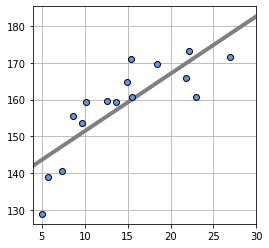

In [7]:
def show_line(w):
  xb = np.linspace(X_min, X_max, 100)
  y = w[0]*xb + w[1]
  plt.plot(xb, y, color=(.5, .5, .5), linewidth = 4)

def fit_line(x, t):
  mx = np.mean(x)
  mt = np.mean(t)
  mtx = np.mean(t*x)
  mxx = np.mean(x*x)
  w0 = (mtx - mt*mx)/ (mxx-mx**2)
  w1 = mt - w0*mx
  return np.array([w0, w1])

W = fit_line(X, T)
print("w0={0:.3f}, w1={1:.3f}".format(W[0], W[1]))
mse = mse_line(X, T, W)
plt.figure(figsize=(4,4))
show_line(W)
plt.plot(X, T, marker='o', linestyle='None', color='cornflowerblue', markeredgecolor='black')
plt.xlim(X_min,X_max)
plt.grid(True)
plt.show()

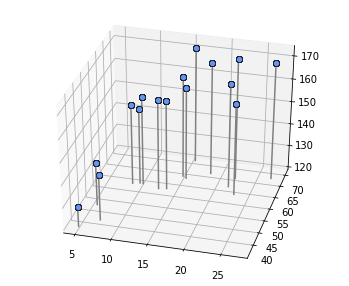

In [8]:
X0 = X
X0_min = 5
X0_max = 30
np.random.seed(seed = 1)
X1 = 23*(T/100)**2 + 2*np.random.randn(X_n)
X1_min = 40
X1_max = 75

def show_data2(ax, x0, x1, t):
  for i in range(len(x0)):
    ax.plot([x0[i], x0[i]], [x1[i], x1[i]], [120, t[i]], color='gray')
    ax.plot(x0, x1, t, 'o', color='cornflowerblue', markeredgecolor='black', markersize=6, markeredgewidth=0.5)
    ax.view_init(elev=35, azim=-75)

plt.figure(figsize=(6,5))
ax=plt.subplot(1, 1, 1, projection='3d')
show_data2(ax, X0, X1, T)
plt.show()

SD=12.876cm


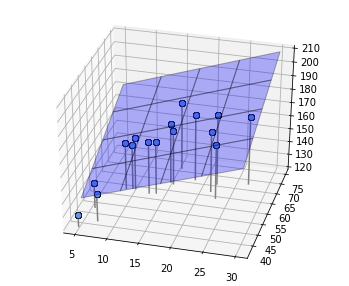

In [11]:
def show_plane(ax, w):
  px0 = np.linspace(X0_min, X0_max, 5)
  px1 = np.linspace(X1_min, X1_max, 5)
  px0, px1 = np.meshgrid(px0, px1)
  y = w[0]*px0 + w[1]*px1 + w[2]
  ax.plot_surface(px0, px1, y, rstride=1, cstride=1, alpha=0.3, color='blue', edgecolor='black')

def mse_plane(x0, x1, t, w):
  y = w[0]*x0 + w[1]*x1 + w[2]
  mse = np.mean((y-t)**2)
  return mse

plt.figure(figsize=(6,5))
ax = plt.subplot(1, 1, 1, projection='3d')
W = [1.5, 1, 90]
show_plane(ax, W)
show_data2(ax, X0, X1, T)
mse = mse_plane(X0, X1, T, W)
print("SD={0:.3f}cm".format(np.sqrt(mse)))
plt.show()